In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

sampling_indices = (3, 4)

## Generate many objects in parallel

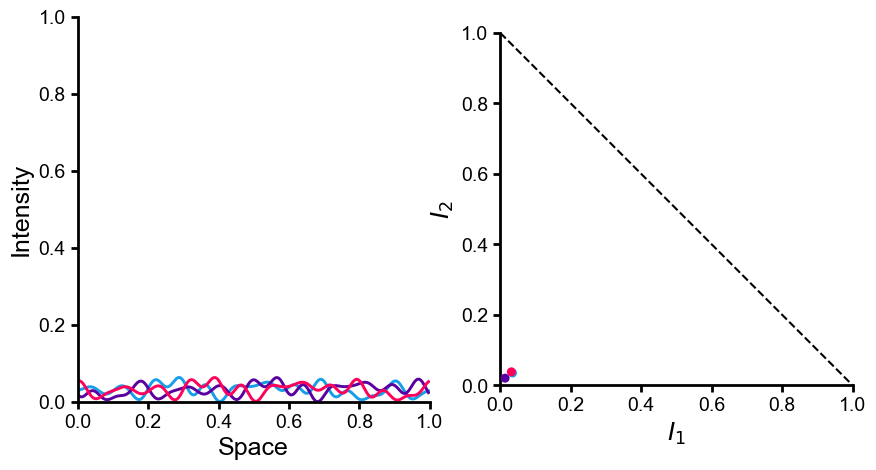

In [2]:
n_objects = 20
objects = np.array([sample_amplitude_object('delta') for i in range(n_objects)])

# generate random convolution kernel
random_kernel = bandlimited_nonnegative_signal(nyquist_samples=generate_random_bandlimited_signal())
conv_mat = make_convolutional_encoder(random_kernel)

output_signals = objects @ conv_mat.T 


sampling_indices = (3, 4)
num_to_plot = 3

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_in_spatial_coordinates(ax[0], output_signals[:num_to_plot], sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax[1], output_signals[:num_to_plot], sample_point_indices=sampling_indices, differentiate_colors=True)

## 2D plot of space mapped to by single delta function vs multiple

  0%|          | 0/118 [00:00<?, ?it/s]

initial loss 0.009705977


  1%|          | 1/118 [00:24<47:58, 24.60s/it]

initial loss 0.008880101


  2%|▏         | 2/118 [00:38<35:11, 18.20s/it]

initial loss 0.018598445


  3%|▎         | 3/118 [00:59<37:05, 19.36s/it]

initial loss 0.038861006


  3%|▎         | 4/118 [01:17<36:13, 19.07s/it]

initial loss 0.06966779


  4%|▍         | 5/118 [01:36<35:54, 19.07s/it]

initial loss 0.11101878


  5%|▌         | 6/118 [01:51<32:40, 17.51s/it]

initial loss 0.16291401


  6%|▌         | 7/118 [02:10<33:35, 18.16s/it]

initial loss 0.22535342


  7%|▋         | 8/118 [02:25<31:06, 16.97s/it]

initial loss 0.2983371


  8%|▊         | 9/118 [03:26<55:51, 30.75s/it]

initial loss 0.381865


  8%|▊         | 10/118 [04:00<57:25, 31.90s/it]

initial loss 0.47593704


  9%|▉         | 11/118 [04:15<47:34, 26.68s/it]

initial loss 0.5805534


 10%|█         | 12/118 [05:14<1:04:16, 36.38s/it]

initial loss 0.69571394


 11%|█         | 13/118 [06:04<1:11:18, 40.74s/it]

initial loss 0.8214187


 12%|█▏        | 14/118 [07:09<1:23:06, 47.95s/it]

initial loss 0.95766747


 13%|█▎        | 15/118 [07:45<1:15:56, 44.24s/it]

initial loss 0.0125176925


 14%|█▎        | 16/118 [08:00<1:00:13, 35.43s/it]

initial loss 0.012031953


 14%|█▍        | 17/118 [08:14<48:47, 28.99s/it]  

initial loss 0.022090433


 15%|█▌        | 18/118 [08:27<40:35, 24.35s/it]

initial loss 0.042693134


 16%|█▌        | 19/118 [08:47<37:56, 23.00s/it]

initial loss 0.073840044


 17%|█▋        | 20/118 [09:04<34:30, 21.13s/it]

initial loss 0.115531184


 18%|█▊        | 21/118 [09:17<30:30, 18.87s/it]

initial loss 0.16776656


 19%|█▊        | 22/118 [09:38<30:48, 19.25s/it]

initial loss 0.23054609


 19%|█▉        | 23/118 [09:54<29:08, 18.41s/it]

initial loss 0.3038699


 20%|██        | 24/118 [10:07<26:23, 16.85s/it]

initial loss 0.38773793


 21%|██        | 25/118 [10:43<34:56, 22.55s/it]

initial loss 0.4821501


 22%|██▏       | 26/118 [11:48<54:05, 35.28s/it]

initial loss 0.5871066


 23%|██▎       | 27/118 [12:31<57:01, 37.59s/it]

initial loss 0.70260733


 24%|██▎       | 28/118 [13:21<1:01:58, 41.32s/it]

initial loss 0.8286521


 25%|██▍       | 29/118 [14:21<1:09:22, 46.77s/it]

initial loss 0.025873626


 25%|██▌       | 30/118 [14:35<54:21, 37.07s/it]  

initial loss 0.02572802


 26%|██▋       | 31/118 [14:49<43:38, 30.09s/it]

initial loss 0.03612664


 27%|██▋       | 32/118 [15:03<36:12, 25.26s/it]

initial loss 0.05706948


 28%|██▊       | 33/118 [15:23<33:43, 23.81s/it]

initial loss 0.08855653


 29%|██▉       | 34/118 [15:43<31:34, 22.56s/it]

initial loss 0.13058779


 30%|██▉       | 35/118 [16:11<33:26, 24.17s/it]

initial loss 0.18316332


 31%|███       | 36/118 [16:34<32:35, 23.84s/it]

initial loss 0.24628296


 31%|███▏      | 37/118 [16:52<29:48, 22.07s/it]

initial loss 0.31994694


 32%|███▏      | 38/118 [17:28<35:04, 26.31s/it]

initial loss 0.40415508


 33%|███▎      | 39/118 [17:47<31:47, 24.14s/it]

initial loss 0.49890742


 34%|███▍      | 40/118 [18:49<46:10, 35.52s/it]

initial loss 0.60420406


 35%|███▍      | 41/118 [19:54<56:57, 44.39s/it]

initial loss 0.049773782


 36%|███▌      | 42/118 [20:06<43:58, 34.71s/it]

initial loss 0.049968313


 36%|███▋      | 43/118 [20:31<39:39, 31.72s/it]

initial loss 0.060707066


 37%|███▋      | 44/118 [20:51<34:48, 28.22s/it]

initial loss 0.08199004


 38%|███▊      | 45/118 [21:12<31:31, 25.91s/it]

initial loss 0.11381723


 39%|███▉      | 46/118 [21:27<27:28, 22.90s/it]

initial loss 0.15618864


 40%|███▉      | 47/118 [21:48<26:25, 22.33s/it]

initial loss 0.20910427


 41%|████      | 48/118 [22:13<26:42, 22.90s/it]

initial loss 0.27256408


 42%|████▏     | 49/118 [22:34<25:55, 22.55s/it]

initial loss 0.34656817


 42%|████▏     | 50/118 [23:06<28:45, 25.37s/it]

initial loss 0.43111646


 43%|████▎     | 51/118 [23:43<32:07, 28.77s/it]

initial loss 0.52620894


 44%|████▍     | 52/118 [24:18<33:48, 30.74s/it]

initial loss 0.6318456


 45%|████▍     | 53/118 [25:23<44:20, 40.92s/it]

initial loss 0.084218144


 46%|████▌     | 54/118 [25:34<34:11, 32.05s/it]

initial loss 0.08475282


 47%|████▋     | 55/118 [25:47<27:30, 26.19s/it]

initial loss 0.09583171


 47%|████▋     | 56/118 [26:01<23:12, 22.46s/it]

initial loss 0.11745481


 48%|████▊     | 57/118 [26:20<21:51, 21.50s/it]

initial loss 0.14962213


 49%|████▉     | 58/118 [26:35<19:28, 19.48s/it]

initial loss 0.19233367


 50%|█████     | 59/118 [26:52<18:26, 18.75s/it]

initial loss 0.24558946


 51%|█████     | 60/118 [27:12<18:33, 19.20s/it]

initial loss 0.3093894


 52%|█████▏    | 61/118 [27:40<20:37, 21.72s/it]

initial loss 0.38373363


 53%|█████▎    | 62/118 [28:19<25:04, 26.86s/it]

initial loss 0.4686221


 53%|█████▎    | 63/118 [29:21<34:30, 37.65s/it]

initial loss 0.56405467


 54%|█████▍    | 64/118 [30:26<41:10, 45.75s/it]

initial loss 0.12920675


 55%|█████▌    | 65/118 [30:35<30:47, 34.86s/it]

initial loss 0.13008153


 56%|█████▌    | 66/118 [30:52<25:24, 29.33s/it]

initial loss 0.14150056


 57%|█████▋    | 67/118 [31:15<23:20, 27.47s/it]

initial loss 0.1634638


 58%|█████▊    | 68/118 [31:41<22:35, 27.11s/it]

initial loss 0.19597125


 58%|█████▊    | 69/118 [32:08<22:06, 27.08s/it]

initial loss 0.23902294


 59%|█████▉    | 70/118 [32:33<21:04, 26.35s/it]

initial loss 0.29261887


 60%|██████    | 71/118 [32:53<19:12, 24.51s/it]

initial loss 0.35675895


 61%|██████    | 72/118 [33:18<18:52, 24.63s/it]

initial loss 0.43144333


 62%|██████▏   | 73/118 [34:08<24:07, 32.17s/it]

initial loss 0.5166719


 63%|██████▎   | 74/118 [35:05<29:10, 39.78s/it]

initial loss 0.18473956


 64%|██████▎   | 75/118 [35:14<21:44, 30.34s/it]

initial loss 0.18595448


 64%|██████▍   | 76/118 [35:30<18:14, 26.06s/it]

initial loss 0.19771364


 65%|██████▌   | 77/118 [35:43<15:11, 22.24s/it]

initial loss 0.22001705


 66%|██████▌   | 78/118 [36:28<19:16, 28.90s/it]

initial loss 0.2528646


 67%|██████▋   | 79/118 [37:05<20:30, 31.56s/it]

initial loss 0.29625642


 68%|██████▊   | 80/118 [37:25<17:44, 28.02s/it]

initial loss 0.35019252


 69%|██████▊   | 81/118 [37:41<14:59, 24.31s/it]

initial loss 0.4146727


 69%|██████▉   | 82/118 [38:33<19:33, 32.60s/it]

initial loss 0.48969722


 70%|███████   | 83/118 [39:31<23:33, 40.38s/it]

initial loss 0.25081655


 71%|███████   | 84/118 [39:43<18:06, 31.96s/it]

initial loss 0.25237164


 72%|███████▏  | 85/118 [39:59<14:54, 27.10s/it]

initial loss 0.26447093


 73%|███████▎  | 86/118 [40:15<12:39, 23.73s/it]

initial loss 0.28711444


 74%|███████▎  | 87/118 [40:34<11:30, 22.27s/it]

initial loss 0.3203022


 75%|███████▍  | 88/118 [40:55<10:59, 22.00s/it]

initial loss 0.36403415


 75%|███████▌  | 89/118 [41:23<11:25, 23.65s/it]

initial loss 0.41831034


 76%|███████▋  | 90/118 [42:15<14:58, 32.07s/it]

initial loss 0.4831307


 77%|███████▋  | 91/118 [43:13<17:59, 39.99s/it]

initial loss 0.32743785


 78%|███████▊  | 92/118 [43:23<13:25, 30.97s/it]

initial loss 0.32933307


 79%|███████▉  | 93/118 [43:36<10:37, 25.50s/it]

initial loss 0.34177253


 80%|███████▉  | 94/118 [43:49<08:45, 21.89s/it]

initial loss 0.36475614


 81%|████████  | 95/118 [44:09<08:07, 21.20s/it]

initial loss 0.39828402


 81%|████████▏ | 96/118 [44:44<09:19, 25.44s/it]

initial loss 0.44235608


 82%|████████▏ | 97/118 [45:48<12:57, 37.02s/it]

initial loss 0.4969724


 83%|████████▎ | 98/118 [46:53<15:06, 45.33s/it]

initial loss 0.41460335


 84%|████████▍ | 99/118 [47:03<10:58, 34.68s/it]

initial loss 0.41683874


 85%|████████▍ | 100/118 [47:14<08:18, 27.72s/it]

initial loss 0.42961827


 86%|████████▌ | 101/118 [47:41<07:44, 27.32s/it]

initial loss 0.45294204


 86%|████████▋ | 102/118 [47:58<06:28, 24.30s/it]

initial loss 0.48681006


 87%|████████▋ | 103/118 [49:02<09:04, 36.33s/it]

initial loss 0.5312222


 88%|████████▊ | 104/118 [49:38<08:27, 36.26s/it]

initial loss 0.512313


 89%|████████▉ | 105/118 [49:52<06:22, 29.46s/it]

initial loss 0.51488847


 90%|████████▉ | 106/118 [50:03<04:46, 23.85s/it]

initial loss 0.52800816


 91%|█████████ | 107/118 [50:20<03:59, 21.81s/it]

initial loss 0.5516721


 92%|█████████▏| 108/118 [50:40<03:34, 21.43s/it]

initial loss 0.5858802


 92%|█████████▏| 109/118 [51:45<05:08, 34.30s/it]

initial loss 0.62056696


 93%|█████████▎| 110/118 [51:57<03:41, 27.64s/it]

initial loss 0.6234826


 94%|█████████▍| 111/118 [52:22<03:07, 26.82s/it]

initial loss 0.6369424


 95%|█████████▍| 112/118 [52:44<02:32, 25.42s/it]

initial loss 0.6609465


 96%|█████████▌| 113/118 [53:20<02:23, 28.75s/it]

initial loss 0.7393651


 97%|█████████▋| 114/118 [53:30<01:31, 22.93s/it]

initial loss 0.7426208


 97%|█████████▋| 115/118 [53:46<01:03, 21.10s/it]

initial loss 0.86870736


 98%|█████████▊| 116/118 [53:56<00:35, 17.65s/it]

initial loss 0.8723033


 99%|█████████▉| 117/118 [54:24<00:20, 20.65s/it]

initial loss 1.0085938


100%|██████████| 118/118 [54:36<00:00, 27.76s/it]


  0%|          | 0/118 [00:00<?, ?it/s]

initial loss 0.0062916568


  1%|          | 1/118 [00:34<1:07:15, 34.49s/it]

initial loss 0.004760868


  2%|▏         | 2/118 [01:00<57:15, 29.61s/it]  

initial loss 0.013774297


  3%|▎         | 3/118 [01:26<53:37, 27.98s/it]

initial loss 0.03333195


  3%|▎         | 4/118 [01:52<51:30, 27.11s/it]

initial loss 0.06343381


  4%|▍         | 5/118 [02:14<47:16, 25.10s/it]

initial loss 0.10407989


  5%|▌         | 6/118 [02:35<44:47, 24.00s/it]

initial loss 0.15527022


  6%|▌         | 7/118 [02:52<39:57, 21.60s/it]

initial loss 0.2170047


  7%|▋         | 8/118 [03:15<40:30, 22.09s/it]

initial loss 0.28928345


  8%|▊         | 9/118 [03:28<35:04, 19.31s/it]

initial loss 0.37210646


  8%|▊         | 10/118 [03:45<33:05, 18.38s/it]

initial loss 0.46547356


  9%|▉         | 11/118 [04:00<31:05, 17.44s/it]

initial loss 0.569385


 10%|█         | 12/118 [04:12<27:56, 15.81s/it]

initial loss 0.6838407


 11%|█         | 13/118 [04:24<25:44, 14.71s/it]

initial loss 0.8088405


 12%|█▏        | 14/118 [04:42<26:51, 15.50s/it]

initial loss 0.9443845


 13%|█▎        | 15/118 [04:57<26:20, 15.35s/it]

initial loss 0.0066155368


 14%|█▎        | 16/118 [05:32<36:13, 21.31s/it]

initial loss 0.005424884


 14%|█▍        | 17/118 [06:05<41:43, 24.79s/it]

initial loss 0.01477845


 15%|█▌        | 18/118 [06:31<42:14, 25.34s/it]

initial loss 0.03467624


 16%|█▌        | 19/118 [06:46<36:32, 22.15s/it]

initial loss 0.06511824


 17%|█▋        | 20/118 [07:02<33:12, 20.33s/it]

initial loss 0.10610445


 18%|█▊        | 21/118 [07:22<32:29, 20.09s/it]

initial loss 0.1576349


 19%|█▊        | 22/118 [07:35<28:49, 18.01s/it]

initial loss 0.21970955


 19%|█▉        | 23/118 [07:52<28:19, 17.89s/it]

initial loss 0.29232845


 20%|██        | 24/118 [08:03<24:51, 15.87s/it]

initial loss 0.37549153


 21%|██        | 25/118 [08:18<24:03, 15.52s/it]

initial loss 0.46919885


 22%|██▏       | 26/118 [08:36<24:46, 16.16s/it]

initial loss 0.5734504


 23%|██▎       | 27/118 [08:47<22:21, 14.74s/it]

initial loss 0.68824625


 24%|██▎       | 28/118 [09:16<28:20, 18.89s/it]

initial loss 0.8135862


 25%|██▍       | 29/118 [09:37<29:05, 19.61s/it]

initial loss 0.017483635


 25%|██▌       | 30/118 [10:03<31:43, 21.63s/it]

initial loss 0.01663312


 26%|██▋       | 31/118 [10:29<33:11, 22.89s/it]

initial loss 0.026326822


 27%|██▋       | 32/118 [10:51<32:12, 22.48s/it]

initial loss 0.046564743


 28%|██▊       | 33/118 [11:04<27:44, 19.58s/it]

initial loss 0.077346876


 29%|██▉       | 34/118 [11:21<26:25, 18.87s/it]

initial loss 0.118673235


 30%|██▉       | 35/118 [11:37<25:02, 18.11s/it]

initial loss 0.17054382


 31%|███       | 36/118 [11:51<23:04, 16.88s/it]

initial loss 0.23295859


 31%|███▏      | 37/118 [12:06<21:45, 16.11s/it]

initial loss 0.30591762


 32%|███▏      | 38/118 [12:27<23:46, 17.83s/it]

initial loss 0.3894209


 33%|███▎      | 39/118 [12:43<22:26, 17.04s/it]

initial loss 0.48346832


 34%|███▍      | 40/118 [12:58<21:33, 16.58s/it]

initial loss 0.58806


 35%|███▍      | 41/118 [13:21<23:34, 18.36s/it]

initial loss 0.038895957


 36%|███▌      | 42/118 [13:34<21:13, 16.76s/it]

initial loss 0.038385574


 36%|███▋      | 43/118 [13:48<20:11, 16.16s/it]

initial loss 0.048419412


 37%|███▋      | 44/118 [14:09<21:37, 17.53s/it]

initial loss 0.06899747


 38%|███▊      | 45/118 [14:25<20:54, 17.18s/it]

initial loss 0.10011975


 39%|███▉      | 46/118 [14:42<20:12, 16.84s/it]

initial loss 0.14178623


 40%|███▉      | 47/118 [14:53<18:06, 15.30s/it]

initial loss 0.19399695


 41%|████      | 48/118 [15:21<22:21, 19.16s/it]

initial loss 0.25675187


 42%|████▏     | 49/118 [15:36<20:21, 17.70s/it]

initial loss 0.33005106


 42%|████▏     | 50/118 [15:50<18:55, 16.70s/it]

initial loss 0.41389444


 43%|████▎     | 51/118 [16:02<17:09, 15.36s/it]

initial loss 0.50828195


 44%|████▍     | 52/118 [16:28<20:13, 18.39s/it]

initial loss 0.6132139


 45%|████▍     | 53/118 [16:57<23:23, 21.60s/it]

initial loss 0.070852496


 46%|████▌     | 54/118 [17:08<19:45, 18.52s/it]

initial loss 0.07068224


 47%|████▋     | 55/118 [17:20<17:17, 16.47s/it]

initial loss 0.081056215


 47%|████▋     | 56/118 [17:34<16:25, 15.89s/it]

initial loss 0.10197443


 48%|████▊     | 57/118 [17:49<15:47, 15.53s/it]

initial loss 0.13343683


 49%|████▉     | 58/118 [18:05<15:47, 15.80s/it]

initial loss 0.17544344


 50%|█████     | 59/118 [18:24<16:23, 16.67s/it]

initial loss 0.2279943


 51%|█████     | 60/118 [18:42<16:21, 16.93s/it]

initial loss 0.29108936


 52%|█████▏    | 61/118 [19:04<17:42, 18.64s/it]

initial loss 0.3647287


 53%|█████▎    | 62/118 [19:18<16:03, 17.21s/it]

initial loss 0.4489122


 53%|█████▎    | 63/118 [19:50<19:48, 21.60s/it]

initial loss 0.54363984


 54%|█████▍    | 64/118 [20:14<19:57, 22.17s/it]

initial loss 0.11335322


 55%|█████▌    | 65/118 [20:30<17:59, 20.38s/it]

initial loss 0.11352312


 56%|█████▌    | 66/118 [20:47<16:46, 19.36s/it]

initial loss 0.12423724


 57%|█████▋    | 67/118 [21:04<15:58, 18.79s/it]

initial loss 0.14549556


 58%|█████▊    | 68/118 [21:24<15:47, 18.95s/it]

initial loss 0.1772981


 58%|█████▊    | 69/118 [21:46<16:26, 20.14s/it]

initial loss 0.21964487


 59%|█████▉    | 70/118 [22:07<16:16, 20.33s/it]

initial loss 0.27253586


 60%|██████    | 71/118 [22:27<15:45, 20.11s/it]

initial loss 0.33597103


 61%|██████    | 72/118 [22:42<14:13, 18.56s/it]

initial loss 0.4099505


 62%|██████▏   | 73/118 [23:11<16:16, 21.70s/it]

initial loss 0.49447414


 63%|██████▎   | 74/118 [23:33<15:58, 21.79s/it]

initial loss 0.16639823


 64%|██████▎   | 75/118 [23:44<13:17, 18.54s/it]

initial loss 0.16690825


 64%|██████▍   | 76/118 [23:59<12:19, 17.61s/it]

initial loss 0.17796248


 65%|██████▌   | 77/118 [24:17<12:09, 17.80s/it]

initial loss 0.19956096


 66%|██████▌   | 78/118 [24:42<13:07, 19.70s/it]

initial loss 0.23170364


 67%|██████▋   | 79/118 [24:56<11:44, 18.07s/it]

initial loss 0.27439052


 68%|██████▊   | 80/118 [25:14<11:27, 18.09s/it]

initial loss 0.32762167


 69%|██████▊   | 81/118 [25:35<11:39, 18.91s/it]

initial loss 0.391397


 69%|██████▉   | 82/118 [25:54<11:26, 19.08s/it]

initial loss 0.46571657


 70%|███████   | 83/118 [26:18<11:59, 20.55s/it]

initial loss 0.22998737


 71%|███████   | 84/118 [26:31<10:17, 18.15s/it]

initial loss 0.23083754


 72%|███████▏  | 85/118 [26:45<09:16, 16.87s/it]

initial loss 0.2422319


 73%|███████▎  | 86/118 [26:57<08:13, 15.42s/it]

initial loss 0.26417053


 74%|███████▎  | 87/118 [27:12<07:56, 15.36s/it]

initial loss 0.29665333


 75%|███████▍  | 88/118 [27:34<08:38, 17.28s/it]

initial loss 0.33968037


 75%|███████▌  | 89/118 [27:47<07:46, 16.09s/it]

initial loss 0.39325166


 76%|███████▋  | 90/118 [28:29<11:09, 23.90s/it]

initial loss 0.45736712


 77%|███████▋  | 91/118 [28:58<11:22, 25.28s/it]

initial loss 0.3041208


 78%|███████▊  | 92/118 [29:09<09:09, 21.14s/it]

initial loss 0.3053111


 79%|███████▉  | 93/118 [29:28<08:34, 20.56s/it]

initial loss 0.31704563


 80%|███████▉  | 94/118 [29:50<08:23, 20.99s/it]

initial loss 0.33932436


 81%|████████  | 95/118 [30:05<07:21, 19.17s/it]

initial loss 0.3721473


 81%|████████▏ | 96/118 [30:34<08:02, 21.92s/it]

initial loss 0.41551444


 82%|████████▏ | 97/118 [31:02<08:23, 23.99s/it]

initial loss 0.4694259


 83%|████████▎ | 98/118 [32:06<11:54, 35.75s/it]

initial loss 0.38879848


 84%|████████▍ | 99/118 [32:26<09:52, 31.19s/it]

initial loss 0.39032888


 85%|████████▍ | 100/118 [32:43<08:05, 26.98s/it]

initial loss 0.40240353


 86%|████████▌ | 101/118 [33:07<07:20, 25.92s/it]

initial loss 0.4250224


 86%|████████▋ | 102/118 [33:25<06:19, 23.73s/it]

initial loss 0.45818546


 87%|████████▋ | 103/118 [34:05<07:09, 28.61s/it]

initial loss 0.5018928


 88%|████████▊ | 104/118 [35:09<09:09, 39.27s/it]

initial loss 0.48402026


 89%|████████▉ | 105/118 [35:33<07:29, 34.54s/it]

initial loss 0.4858908


 90%|████████▉ | 106/118 [35:56<06:13, 31.09s/it]

initial loss 0.4983056


 91%|█████████ | 107/118 [36:33<06:00, 32.76s/it]

initial loss 0.52126455


 92%|█████████▏| 108/118 [37:37<07:02, 42.21s/it]

initial loss 0.55476785


 92%|█████████▏| 109/118 [38:41<07:19, 48.87s/it]

initial loss 0.5897864


 93%|█████████▎| 110/118 [39:01<05:20, 40.01s/it]

initial loss 0.5919971


 94%|█████████▍| 111/118 [39:31<04:18, 36.94s/it]

initial loss 0.604752


 95%|█████████▍| 112/118 [40:02<03:31, 35.32s/it]

initial loss 0.6280511


 96%|█████████▌| 113/118 [41:06<03:39, 43.98s/it]

initial loss 0.7060967


 97%|█████████▋| 114/118 [41:41<02:44, 41.23s/it]

initial loss 0.7086475


 97%|█████████▋| 115/118 [42:45<02:24, 48.11s/it]

initial loss 0.83295107


 98%|█████████▊| 116/118 [43:19<01:27, 43.87s/it]

initial loss 0.835842


 99%|█████████▉| 117/118 [44:24<00:50, 50.02s/it]

initial loss 0.9703497


  0%|          | 0/118 [00:00<?, ?it/s]

initial loss 0.0038935244


  1%|          | 1/118 [00:32<1:04:09, 32.90s/it]

initial loss 0.004066094


  2%|▏         | 2/118 [01:11<1:10:20, 36.38s/it]

initial loss 0.014782882


  3%|▎         | 3/118 [01:50<1:11:53, 37.51s/it]

initial loss 0.03604389


  3%|▎         | 4/118 [02:07<56:09, 29.56s/it]  

initial loss 0.067849115


  4%|▍         | 5/118 [02:21<44:59, 23.89s/it]

initial loss 0.11019856


  5%|▌         | 6/118 [02:44<44:02, 23.59s/it]

initial loss 0.16309226


  6%|▌         | 7/118 [03:04<41:03, 22.20s/it]

initial loss 0.22653009


  7%|▋         | 8/118 [03:31<43:49, 23.91s/it]

initial loss 0.3005122


  8%|▊         | 9/118 [03:44<36:56, 20.33s/it]

initial loss 0.38503858


  8%|▊         | 10/118 [04:03<36:11, 20.11s/it]

initial loss 0.48010904


  9%|▉         | 11/118 [04:17<32:29, 18.22s/it]

initial loss 0.58572376


 10%|█         | 12/118 [04:35<32:09, 18.20s/it]

initial loss 0.7018829


 11%|█         | 13/118 [04:50<29:48, 17.03s/it]

initial loss 0.82858604


 12%|█▏        | 14/118 [05:05<28:25, 16.40s/it]

initial loss 0.9658333


 13%|█▎        | 15/118 [05:33<34:07, 19.88s/it]

initial loss 0.004017143


 14%|█▎        | 16/118 [06:05<40:15, 23.68s/it]

initial loss 0.0045298487


 14%|█▍        | 17/118 [06:44<47:23, 28.15s/it]

initial loss 0.015586773


 15%|█▌        | 18/118 [07:30<55:57, 33.58s/it]

initial loss 0.03718792


 16%|█▌        | 19/118 [08:16<1:01:40, 37.38s/it]

initial loss 0.06933328


 17%|█▋        | 20/118 [08:50<59:10, 36.23s/it]  

initial loss 0.112022854


 18%|█▊        | 21/118 [09:23<57:03, 35.30s/it]

initial loss 0.16525668


 19%|█▊        | 22/118 [09:41<48:31, 30.33s/it]

initial loss 0.22903466


 19%|█▉        | 23/118 [10:02<43:13, 27.30s/it]

initial loss 0.30335695


 20%|██        | 24/118 [10:16<36:50, 23.52s/it]

initial loss 0.3882234


 21%|██        | 25/118 [10:38<35:42, 23.03s/it]

initial loss 0.48363402


 22%|██▏       | 26/118 [11:07<38:02, 24.81s/it]

initial loss 0.58958894


 23%|██▎       | 27/118 [12:07<53:20, 35.17s/it]

initial loss 0.7060881


 24%|██▎       | 28/118 [12:28<46:22, 30.92s/it]

initial loss 0.8331313


 25%|██▍       | 29/118 [12:49<41:30, 27.98s/it]

initial loss 0.014684981


 25%|██▌       | 30/118 [13:28<45:50, 31.25s/it]

initial loss 0.015537821


 26%|██▋       | 31/118 [14:06<48:27, 33.42s/it]

initial loss 0.026934883


 27%|██▋       | 32/118 [14:51<52:55, 36.93s/it]

initial loss 0.04887617


 28%|██▊       | 33/118 [15:30<53:05, 37.48s/it]

initial loss 0.08136166


 29%|██▉       | 34/118 [16:15<55:42, 39.79s/it]

initial loss 0.12439138


 30%|██▉       | 35/118 [16:48<52:00, 37.60s/it]

initial loss 0.17796533


 31%|███       | 36/118 [17:17<48:05, 35.19s/it]

initial loss 0.24208345


 31%|███▏      | 37/118 [17:37<41:08, 30.47s/it]

initial loss 0.31674585


 32%|███▏      | 38/118 [18:34<51:27, 38.60s/it]

initial loss 0.40195248


 33%|███▎      | 39/118 [18:55<43:51, 33.31s/it]

initial loss 0.4977032


 34%|███▍      | 40/118 [19:14<37:43, 29.02s/it]

initial loss 0.6039983


 35%|███▍      | 41/118 [19:33<33:27, 26.07s/it]

initial loss 0.03589704


 36%|███▌      | 42/118 [20:18<40:11, 31.73s/it]

initial loss 0.037090015


 36%|███▋      | 43/118 [20:57<42:16, 33.82s/it]

initial loss 0.04882721


 37%|███▋      | 44/118 [21:42<45:50, 37.16s/it]

initial loss 0.07110863


 38%|███▊      | 45/118 [22:27<48:10, 39.60s/it]

initial loss 0.10393426


 39%|███▉      | 46/118 [23:12<49:28, 41.22s/it]

initial loss 0.14730412


 40%|███▉      | 47/118 [24:04<52:24, 44.29s/it]

initial loss 0.20121819


 41%|████      | 48/118 [24:47<51:28, 44.12s/it]

initial loss 0.26567644


 42%|████▏     | 49/118 [25:11<43:29, 37.82s/it]

initial loss 0.340679


 42%|████▏     | 50/118 [25:29<36:21, 32.08s/it]

initial loss 0.42622575


 43%|████▎     | 51/118 [25:50<32:03, 28.71s/it]

initial loss 0.52231663


 44%|████▍     | 52/118 [26:21<32:09, 29.23s/it]

initial loss 0.6289518


 45%|████▍     | 53/118 [27:25<42:58, 39.68s/it]

initial loss 0.06765331


 46%|████▌     | 54/118 [27:55<39:19, 36.86s/it]

initial loss 0.06918642


 47%|████▋     | 55/118 [28:40<41:20, 39.37s/it]

initial loss 0.08126376


 47%|████▋     | 56/118 [29:25<42:30, 41.14s/it]

initial loss 0.10388532


 48%|████▊     | 57/118 [30:11<43:03, 42.35s/it]

initial loss 0.13705108


 49%|████▉     | 58/118 [30:42<38:58, 38.98s/it]

initial loss 0.18076107


 50%|█████     | 59/118 [31:15<36:37, 37.24s/it]

initial loss 0.23501527


 51%|█████     | 60/118 [31:48<34:42, 35.91s/it]

initial loss 0.2998137


 52%|█████▏    | 61/118 [32:12<30:50, 32.46s/it]

initial loss 0.37515634


 53%|█████▎    | 62/118 [32:43<29:55, 32.06s/it]

initial loss 0.46104324


 53%|█████▎    | 63/118 [33:28<32:45, 35.74s/it]

initial loss 0.55747426


 54%|█████▍    | 64/118 [33:45<27:10, 30.20s/it]

initial loss 0.10995379


 55%|█████▌    | 65/118 [34:06<24:22, 27.59s/it]

initial loss 0.111827046


 56%|█████▌    | 66/118 [34:36<24:21, 28.11s/it]

initial loss 0.12424452


 57%|█████▋    | 67/118 [35:10<25:26, 29.93s/it]

initial loss 0.1472062


 58%|█████▊    | 68/118 [35:55<28:49, 34.59s/it]

initial loss 0.1807121


 58%|█████▊    | 69/118 [36:44<31:45, 38.89s/it]

initial loss 0.22476223


 59%|█████▉    | 70/118 [37:20<30:25, 38.04s/it]

initial loss 0.2793566


 60%|██████    | 71/118 [37:39<25:14, 32.23s/it]

initial loss 0.34449512


 61%|██████    | 72/118 [37:55<21:04, 27.49s/it]

initial loss 0.4201779


 62%|██████▏   | 73/118 [38:54<27:31, 36.70s/it]

initial loss 0.506405


 63%|██████▎   | 74/118 [39:17<23:55, 32.63s/it]

initial loss 0.16279852


 64%|██████▎   | 75/118 [39:50<23:26, 32.71s/it]

initial loss 0.1650119


 64%|██████▍   | 76/118 [40:41<26:50, 38.35s/it]

initial loss 0.17776951


 65%|██████▌   | 77/118 [41:32<28:52, 42.27s/it]

initial loss 0.20107134


 66%|██████▌   | 78/118 [41:58<24:50, 37.27s/it]

initial loss 0.23491737


 67%|██████▋   | 79/118 [42:50<27:01, 41.56s/it]

initial loss 0.27930766


 68%|██████▊   | 80/118 [43:38<27:36, 43.58s/it]

initial loss 0.33424217


 69%|██████▊   | 81/118 [44:30<28:20, 45.97s/it]

initial loss 0.3997208


 69%|██████▉   | 82/118 [45:28<29:44, 49.58s/it]

initial loss 0.47574374


 70%|███████   | 83/118 [46:25<30:21, 52.05s/it]

initial loss 0.22618741


 71%|███████   | 84/118 [46:40<23:11, 40.93s/it]

initial loss 0.22874093


 72%|███████▏  | 85/118 [47:26<23:17, 42.34s/it]

initial loss 0.24183868


 73%|███████▎  | 86/118 [48:18<24:07, 45.22s/it]

initial loss 0.26548064


 74%|███████▎  | 87/118 [48:35<19:03, 36.89s/it]

initial loss 0.29966682


 75%|███████▍  | 88/118 [49:27<20:39, 41.32s/it]

initial loss 0.34439722


 75%|███████▌  | 89/118 [50:18<21:26, 44.36s/it]

initial loss 0.39967185


 76%|███████▋  | 90/118 [50:59<20:10, 43.23s/it]

initial loss 0.46549064


 77%|███████▋  | 91/118 [51:37<18:47, 41.74s/it]

initial loss 0.3001206


 78%|███████▊  | 92/118 [52:35<20:13, 46.67s/it]

initial loss 0.30301425


 79%|███████▉  | 93/118 [53:27<20:06, 48.26s/it]

initial loss 0.31645218


 80%|███████▉  | 94/118 [54:19<19:40, 49.17s/it]

initial loss 0.34043422


 81%|████████  | 95/118 [55:17<19:51, 51.83s/it]

initial loss 0.37496057


 81%|████████▏ | 96/118 [56:15<19:39, 53.62s/it]

initial loss 0.42003107


 82%|████████▏ | 97/118 [56:40<15:47, 45.14s/it]

initial loss 0.47564584


 83%|████████▎ | 98/118 [57:02<12:43, 38.17s/it]

initial loss 0.38459802


 84%|████████▍ | 99/118 [58:00<13:58, 44.14s/it]

initial loss 0.38783184


 85%|████████▍ | 100/118 [58:34<12:20, 41.13s/it]

initial loss 0.4016098


 86%|████████▌ | 101/118 [58:58<10:09, 35.86s/it]

initial loss 0.42593205


 86%|████████▋ | 102/118 [59:27<09:02, 33.93s/it]

initial loss 0.4607985


 87%|████████▋ | 103/118 [1:00:25<10:17, 41.17s/it]

initial loss 0.5062092


 88%|████████▊ | 104/118 [1:00:59<09:04, 38.88s/it]

initial loss 0.47961956


 89%|████████▉ | 105/118 [1:01:16<07:00, 32.33s/it]

initial loss 0.48319346


 90%|████████▉ | 106/118 [1:01:32<05:31, 27.63s/it]

initial loss 0.49731162


 91%|█████████ | 107/118 [1:02:02<05:12, 28.38s/it]

initial loss 0.52197397


 92%|█████████▏| 108/118 [1:02:20<04:12, 25.25s/it]

initial loss 0.5571806


 92%|█████████▏| 109/118 [1:03:01<04:29, 29.93s/it]

initial loss 0.58518535


 93%|█████████▎| 110/118 [1:03:18<03:27, 25.99s/it]

initial loss 0.5890994


 94%|█████████▍| 111/118 [1:03:59<03:33, 30.43s/it]

initial loss 0.6035577


 95%|█████████▍| 112/118 [1:04:31<03:05, 30.88s/it]

initial loss 0.62856025


 96%|█████████▌| 113/118 [1:04:57<02:27, 29.47s/it]

initial loss 0.7012954


 97%|█████████▋| 114/118 [1:05:07<01:34, 23.60s/it]

initial loss 0.7055496


 97%|█████████▋| 115/118 [1:05:25<01:06, 22.04s/it]

initial loss 0.8279496


 98%|█████████▊| 116/118 [1:05:58<00:50, 25.23s/it]

initial loss 0.8325439


 99%|█████████▉| 117/118 [1:06:28<00:26, 26.63s/it]

initial loss 0.965148


100%|██████████| 118/118 [1:07:14<00:00, 34.19s/it]

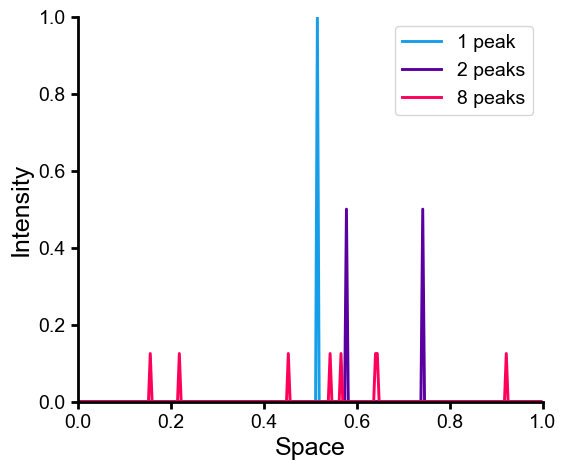

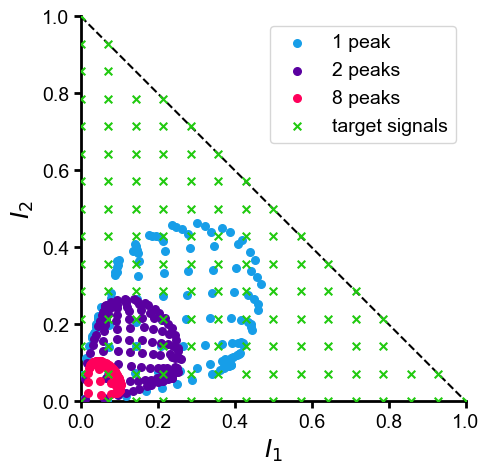

In [3]:
sampling_indices = (3, 4)

grid_density = 15

input_signals = [sample_amplitude_object('delta', num_deltas=1), 
                 sample_amplitude_object('delta', num_deltas=2),
                    sample_amplitude_object('delta', num_deltas=8)]
labels = ['1 peak', '2 peaks', '8 peaks']


target_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=grid_density)

sets_of_output_signals = []
for input_signal in input_signals:
    optimized_kernels, output_signals = optimize_towards_target_signals(target_signals, input_signal, sampling_indices=sampling_indices, verbose=True)
    sets_of_output_signals.append(output_signals)


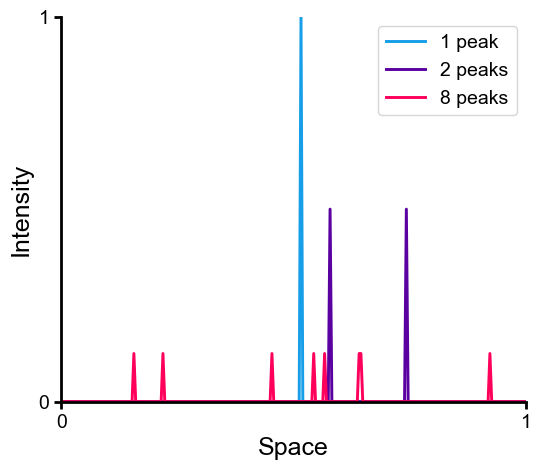

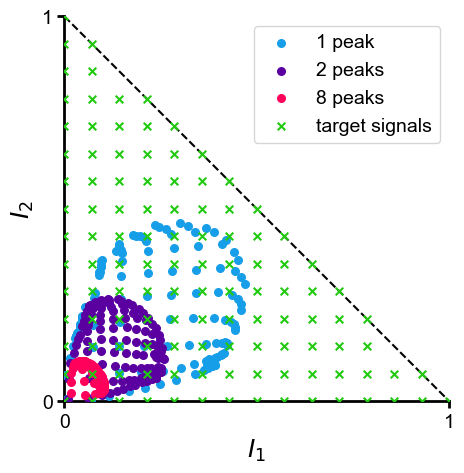

In [4]:
# make a 3x1 plot with shared x and y axes showing the input signals
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for i, (input_signal, label) in enumerate(zip(input_signals, labels)):
    plot_in_spatial_coordinates(ax, input_signal, show_samples=False, label=label)
ax.legend()


fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for output_signals, label in zip(sets_of_output_signals, labels):
    plot_in_intensity_coordinates(ax, output_signals, label=label, sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax, target_signals, label='target signals',  marker='x',  sample_point_indices=sampling_indices, color='k')
ax.legend()